# GeoPandas

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/giswqs/geog-510/blob/main/book/geospatial/geopandas.ipynb)

## Overview

[GeoPandas](https://geopandas.org) is an open-source Python library that simplifies working with geospatial data by extending Pandas data structures. It seamlessly integrates geospatial operations with a pandas-like interface, allowing for the manipulation of geometric types such as points, lines, and polygons. GeoPandas combines the functionalities of Pandas and Shapely, enabling geospatial operations like spatial joins, buffering, intersections, and projections with ease.

## Learning Objectives

By the end of this lecture, you should be able to:

- Understand the basic data structures in GeoPandas: `GeoDataFrame` and `GeoSeries`.
- Create `GeoDataFrames` from tabular data and geometric shapes.
- Read and write geospatial data formats like Shapefile and GeoJSON.
- Perform common geospatial operations such as measuring areas, distances, and spatial relationships.
- Visualize geospatial data using Matplotlib and GeoPandas' built-in plotting functions.
- Work with different Coordinate Reference Systems (CRS) and project geospatial data.

## Concepts

The core data structures in GeoPandas are `GeoDataFrame` and `GeoSeries`. A `GeoDataFrame` extends the functionality of a Pandas DataFrame by adding a geometry column, allowing spatial data operations on geometric shapes. The `GeoSeries` handles geometric data (points, polygons, etc.).

A `GeoDataFrame` can have multiple geometry columns, but only one is considered the active geometry at any time. All spatial operations are applied to this active geometry, accessible via the `.geometry` attribute.

## Installing and Importing GeoPandas

Before we begin, make sure you have geopandas installed. You can install it using:

In [ ]:
# %pip install geopandas

Once installed, import GeoPandas and other necessary libraries:

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Creating GeoDataFrames

A GeoDataFrame is a tabular data structure that contains a `geometry` column, which holds the geometric shapes. You can create a GeoDataFrame from a list of geometries or from a pandas DataFrame.

In [2]:
# Creating a GeoDataFrame from scratch
data = {
    "City": ["Tokyo", "New York", "London", "Paris"],
    "Latitude": [35.6895, 40.7128, 51.5074, 48.8566],
    "Longitude": [139.6917, -74.0060, -0.1278, 2.3522],
}

df = pd.DataFrame(data)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf

City  Latitude  Longitude                    geometry
0     Tokyo   35.6895   139.6917  POINT (139.69170 35.68950)
1  New York   40.7128   -74.0060  POINT (-74.00600 40.71280)
2    London   51.5074    -0.1278   POINT (-0.12780 51.50740)
3     Paris   48.8566     2.3522    POINT (2.35220 48.85660)

## Reading and Writing Geospatial Data

GeoPandas allows reading and writing a variety of geospatial formats, such as Shapefiles, GeoJSON, and more. We'll use a GeoJSON dataset of New York City borough boundaries.

### Reading a GeoJSON File

We'll load the New York boroughs dataset from a GeoJSON file hosted online.

In [3]:
url = "https://github.com/opengeos/datasets/releases/download/vector/nybb.geojson"
gdf = gpd.read_file(url)
gdf.head()

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

This `GeoDataFrame` contains several columns, including `BoroName`, which represents the names of the boroughs, and `geometry`, which stores the polygons for each borough.

### Writing to a GeoJSON File

GeoPandas also supports saving geospatial data back to disk. For example, we can save the GeoDataFrame as a new GeoJSON file:

In [4]:
output_file = "nyc_boroughs.geojson"
gdf.to_file(output_file, driver="GeoJSON")
print(f"GeoDataFrame has been written to {output_file}")

GeoDataFrame has been written to nyc_boroughs.geojson


Similarly, you can write GeoDataFrames to other formats, such as Shapefiles, GeoPackage, and more.

In [7]:
output_file = "nyc_boroughs.shp"
gdf.to_file(output_file)

In [8]:
output_file = "nyc_boroughs.gpkg"
gdf.to_file(output_file, driver="GPKG")

## Simple Accessors and Methods

Now that we have the data, let's explore some simple GeoPandas methods to manipulate and analyze the geometric data.

### Measuring Area

We can calculate the area of each borough. GeoPandas automatically calculates the area of each polygon:

In [9]:
# Set BoroName as the index for easier reference
gdf = gdf.set_index("BoroName")

# Calculate the area
gdf["area"] = gdf.area
gdf

BoroCode     Shape_Leng    Shape_Area  \
BoroName                                               
Staten Island         5  330470.010332  1.623820e+09   
Queens                4  896344.047763  3.045213e+09   
Brooklyn              3  741080.523166  1.937479e+09   
Manhattan             1  359299.096471  6.364715e+08   
Bronx                 2  464392.991824  1.186925e+09   

                                                        geometry          area  
BoroName                                                                        
Staten Island  MULTIPOLYGON (((970217.022 145643.332, 970227....  1.623822e+09  
Queens         MULTIPOLYGON (((1029606.077 156073.814, 102957...  3.045214e+09  
Brooklyn       MULTIPOLYGON (((1021176.479 151374.797, 102100...  1.937478e+09  
Manhattan      MULTIPOLYGON (((981219.056 188655.316, 980940....  6.364712e+08  
Bronx          MULTIPOLYGON (((1012821.806 229228.265, 101278...  1.186926e+09

### Getting Polygon Boundaries and Centroids

To get the boundary (lines) and centroid (center point) of each polygon:

In [10]:
# Get the boundary of each polygon
gdf["boundary"] = gdf.boundary

# Get the centroid of each polygon
gdf["centroid"] = gdf.centroid

gdf[["boundary", "centroid"]]

boundary  \
BoroName                                                           
Staten Island  MULTILINESTRING ((970217.022 145643.332, 97022...   
Queens         MULTILINESTRING ((1029606.077 156073.814, 1029...   
Brooklyn       MULTILINESTRING ((1021176.479 151374.797, 1021...   
Manhattan      MULTILINESTRING ((981219.056 188655.316, 98094...   
Bronx          MULTILINESTRING ((1012821.806 229228.265, 1012...   

                                     centroid  
BoroName                                       
Staten Island   POINT (941639.450 150931.991)  
Queens         POINT (1034578.078 197116.604)  
Brooklyn        POINT (998769.115 174169.761)  
Manhattan       POINT (993336.965 222451.437)  
Bronx          POINT (1021174.790 249937.980)

<Axes: >

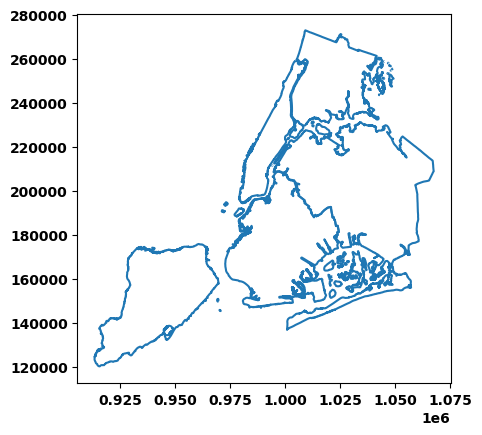

In [12]:
# Added by me to visualize the boundaries
gdf[["boundary", "centroid"]].set_geometry("boundary").plot()

### Measuring Distance

We can also measure the distance from each borough's centroid to a reference point, such as the centroid of Manhattan.

In [13]:
# Use Manhattan's centroid as the reference point
manhattan_centroid = gdf.loc["Manhattan", "centroid"]

# Calculate the distance from each centroid to Manhattan's centroid
gdf["distance_to_manhattan"] = gdf["centroid"].distance(manhattan_centroid)
gdf[["centroid", "distance_to_manhattan"]]

centroid  distance_to_manhattan
BoroName                                                            
Staten Island   POINT (941639.450 150931.991)           88247.742789
Queens         POINT (1034578.078 197116.604)           48401.272479
Brooklyn        POINT (998769.115 174169.761)           48586.299386
Manhattan       POINT (993336.965 222451.437)               0.000000
Bronx          POINT (1021174.790 249937.980)           39121.024479

### Calculating Mean Distance

We can calculate the mean distance between the borough centroids and Manhattan:

In [14]:
mean_distance = gdf["distance_to_manhattan"].mean()
print(f"Mean distance to Manhattan: {mean_distance} units")

Mean distance to Manhattan: 44871.26782659276 units


## Plotting Geospatial Data

GeoPandas integrates with Matplotlib for easy plotting of geospatial data. Let's create some maps to visualize the data.

### Plotting the Area of Each Borough

We can color the boroughs based on their area and display a legend:

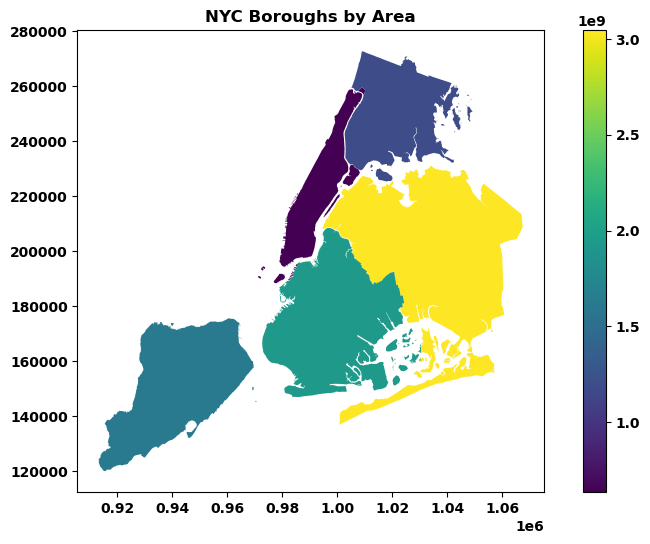

In [15]:
gdf.plot("area", legend=True, figsize=(10, 6))
plt.title("NYC Boroughs by Area")
plt.show()

### Plotting Centroids and Boundaries

We can also plot the centroids and boundaries:

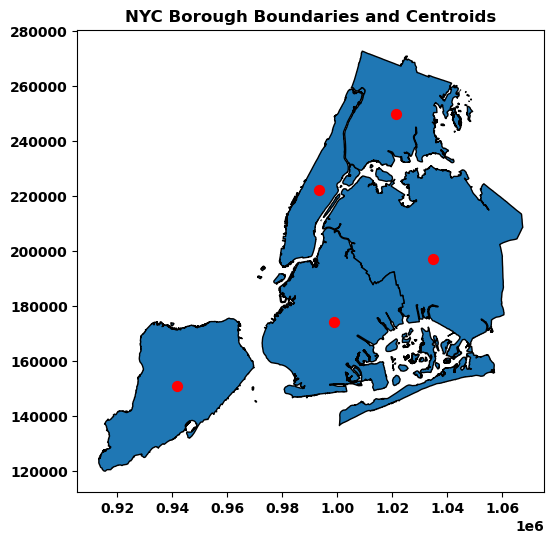

In [19]:
# Plot the boundaries and centroids
ax = gdf["geometry"].plot(figsize=(10, 6), edgecolor="black")
gdf["centroid"].plot(ax=ax, color="red", markersize=50)
plt.title("NYC Borough Boundaries and Centroids")
plt.show()

You can also explore your data interactively using `GeoDataFrame.explore()`, which behaves in the same way `plot()` does but returns an interactive map instead.

In [17]:
gdf.explore("area", legend=False)

## Geometry Manipulations

GeoPandas provides several methods for manipulating geometries, such as buffering (creating a buffer zone around geometries) and computing convex hulls (the smallest convex shape enclosing the geometries).

### Buffering Geometries

We can create a buffer zone around each borough:

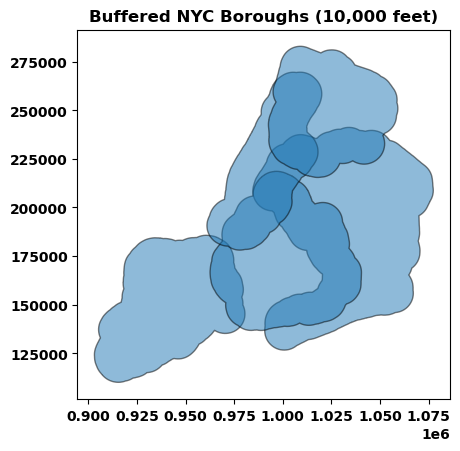

In [20]:
# Buffer the boroughs by 10000 feet
gdf["buffered"] = gdf.buffer(10000)

# Plot the buffered geometries
gdf["buffered"].plot(alpha=0.5, edgecolor="black")
plt.title("Buffered NYC Boroughs (10,000 feet)")
plt.show()

### Convex Hulls

The convex hull is the smallest convex shape that can enclose a geometry. Let's calculate the convex hull for each borough:

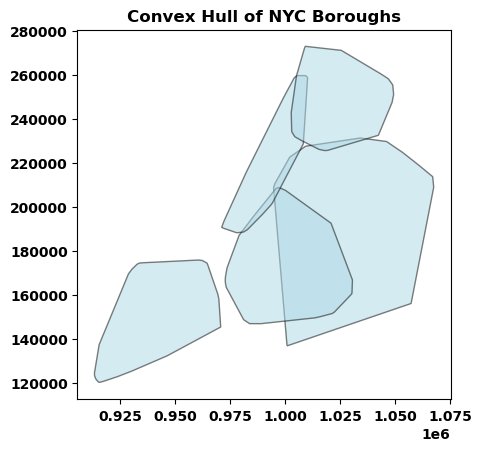

In [21]:
# Calculate convex hull
gdf["convex_hull"] = gdf.convex_hull

# Plot the convex hulls
gdf["convex_hull"].plot(alpha=0.5, color="lightblue", edgecolor="black")
plt.title("Convex Hull of NYC Boroughs")
plt.show()

## Spatial Queries and Relations

We can also perform spatial queries to examine relationships between geometries. For instance, we can check which boroughs are within a certain distance of Manhattan.

### Checking for Intersections

We can find which boroughs' buffered areas intersect with the original geometry of Manhattan:

In [22]:
# Get the geometry of Manhattan
manhattan_geom = gdf.loc["Manhattan", "geometry"]

# Check which buffered boroughs intersect with Manhattan's geometry
gdf["intersects_manhattan"] = gdf["buffered"].intersects(manhattan_geom)
gdf[["intersects_manhattan"]]

intersects_manhattan
BoroName                           
Staten Island                 False
Queens                         True
Brooklyn                       True
Manhattan                      True
Bronx                          True

### Checking for Containment

Similarly, we can check if the centroids are contained within the borough boundaries:

In [23]:
# Check if centroids are within the original borough geometries
gdf["centroid_within_borough"] = gdf["centroid"].within(gdf["geometry"])
gdf[["centroid_within_borough"]]

centroid_within_borough
BoroName                              
Staten Island                     True
Queens                            True
Brooklyn                          True
Manhattan                         True
Bronx                             True

## Projections and Coordinate Reference Systems (CRS)

GeoPandas makes it easy to manage projections. Each GeoSeries and GeoDataFrame has a crs attribute that defines its CRS.

### Checking the CRS

Let's check the CRS of the boroughs dataset:

In [24]:
print(gdf.crs)

EPSG:2263


The CRS for this dataset is [`EPSG:2263`](https://epsg.io/2263) (NAD83 / New York State Plane). We can reproject the geometries to WGS84 ([`EPSG:4326`](https://epsg.io/4326)), which uses latitude and longitude coordinates.

[EPSG](https://epsg.io) stands for European Petroleum Survey Group, which was a scientific organization that standardized geodetic and coordinate reference systems. EPSG codes are unique identifiers that represent coordinate systems and other geodetic properties. 

### Reprojecting to WGS84

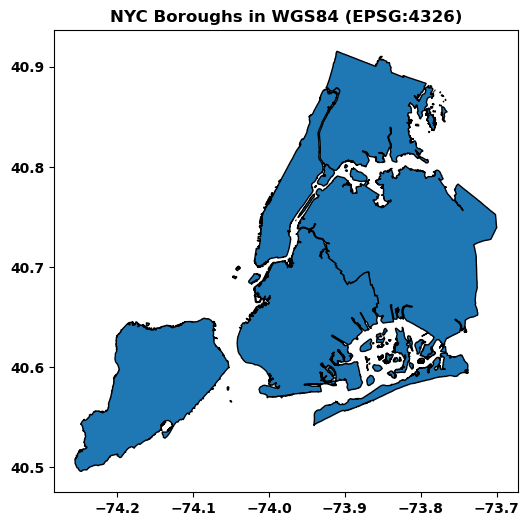

In [25]:
# Reproject the GeoDataFrame to WGS84 (EPSG:4326)
gdf_4326 = gdf.to_crs(epsg=4326)

# Plot the reprojected geometries
gdf_4326.plot(figsize=(10, 6), edgecolor="black")
plt.title("NYC Boroughs in WGS84 (EPSG:4326)")
plt.show()

Notice how the coordinates have changed from feet to degrees.

## Exercises

1. Create a GeoDataFrame containing a list of countries and their capital cities. Add a geometry column with the locations of the capitals.
2. Load a shapefile of your choice, filter the data to only include a specific region or country, and save the filtered GeoDataFrame to a new file.
3. Perform a spatial join between two GeoDataFrames: one containing polygons (e.g., country borders) and one containing points (e.g., cities). Find out which points fall within which polygons.
4. Plot a map showing the distribution of a particular attribute (e.g., population) across different regions.

## Q1

In [26]:
# Loading a gdf containing countries' geometries
url = "data\world_countries.gpkg"
gdf_countries = gpd.read_file(url)
gdf_countries.head()

iso_a2         NAME FIPS_10_ ISO_A3 WB_A2 WB_A3  \
0     NO       Norway       NO    NOR    NO   NOR   
1     SE       Sweden       SW    SWE    SE   SWE   
2     DE      Germany       GM    DEU    DE   DEU   
3     NL  Netherlands       NL    NLD    NL   NLD   
4     RU       Russia       RS    RUS    RU   RUS   

                                            geometry  
0  MULTIPOLYGON (((3.45729 -54.39007, 3.48666 -54...  
1  MULTIPOLYGON (((15.70533 56.11640, 15.72690 56...  
2  MULTIPOLYGON (((6.79811 53.60444, 6.72242 53.5...  
3  MULTIPOLYGON (((-68.21154 12.22809, -68.19001 ...  
4  MULTIPOLYGON (((47.94386 45.49958, 47.91774 45...

In [28]:
gdf_countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
# Changing name column to Country
gdf_countries.rename(columns={"NAME": "Country"}, inplace=True)

In [ ]:
# Creating a gdf with capital cities
df_capitals = pd.read_csv("data\country-capital-lat-long-population.csv")
gdf_capitals = gpd.GeoDataFrame(df_capitals, geometry=gpd.points_from_xy(df_capitals.Longitude, df_capitals.Latitude))
gdf_capitals.head()

Country           Capital City  Latitude  Longitude  Population  \
0     Afghanistan                  Kabul   34.5289    69.1725     4011770   
1         Albania        Tiranë (Tirana)   41.3275    19.8189      475577   
2         Algeria  El Djazaïr  (Algiers)   36.7525     3.0420     2693542   
3  American Samoa              Pago Pago  -14.2781  -170.7025       48526   
4         Andorra       Andorra la Vella   42.5078     1.5211       22614   

  Capital Type                      geometry  
0      Capital     POINT (69.17250 34.52890)  
1      Capital     POINT (19.81890 41.32750)  
2      Capital      POINT (3.04200 36.75250)  
3      Capital  POINT (-170.70250 -14.27810)  
4      Capital      POINT (1.52110 42.50780)

In [32]:
gdf_capitals.crs = "EPSG:4326"  # Set the CRS to WGS84
gdf_capitals.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
gdf_countries_capitals = gdf_countries.merge(gdf_capitals, left_on="Country", right_on="Country", how="left")
gdf_countries_capitals.head()


iso_a2      Country FIPS_10_ ISO_A3 WB_A2 WB_A3  \
0     NO       Norway       NO    NOR    NO   NOR   
1     SE       Sweden       SW    SWE    SE   SWE   
2     DE      Germany       GM    DEU    DE   DEU   
3     NL  Netherlands       NL    NLD    NL   NLD   
4     RU       Russia       RS    RUS    RU   RUS   

                                          geometry_x Capital City  Latitude  \
0  MULTIPOLYGON (((3.45729 -54.39007, 3.48666 -54...         Oslo   59.9127   
1  MULTIPOLYGON (((15.70533 56.11640, 15.72690 56...    Stockholm   59.3326   
2  MULTIPOLYGON (((6.79811 53.60444, 6.72242 53.5...       Berlin   52.5244   
3  MULTIPOLYGON (((-68.21154 12.22809, -68.19001 ...    Amsterdam   52.3740   
4  MULTIPOLYGON (((47.94386 45.49958, 47.91774 45...          NaN       NaN   

   Longitude  Population Capital Type                 geometry_y  
0    10.7461   1012225.0      Capital  POINT (10.74610 59.91270)  
1    18.0649   1582968.0      Capital  POINT (18.06490 59.33260)  
2    13.4105   3552123.0      Capital  POINT (13.41050 52.52440)  
3     4.8897   1131690.0      Capital   POINT (4.88970 52.37400)  
4        NaN         NaN          NaN                       None

In [36]:
# Exporting gdf_capitals to a GeoPackage
output_file = "data\countries_capitals.gpkg"
gdf_capitals.to_file(output_file, driver="GPKG")

## Q2

In [38]:
# Selecting only Tunisia
gdf_tunisia = gdf_countries[gdf_countries["Country"] == "Tunisia"]
gdf_tunisia.to_file(r"data\tunisia.gpkg", driver="GPKG")

In [44]:
gdf_tunisia.explore()

In [48]:
gdf_tunisia.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [51]:
gdf_tunisia

iso_a2  Country FIPS_10_ ISO_A3 WB_A2 WB_A3  \
179     TN  Tunisia       TS    TUN    TN   TUN   

                                              geometry  
179  MULTIPOLYGON (((10.99147 33.84170, 11.06031 33...

In [45]:
gdf_capitals.explore()

## Q3

In [58]:
# Performning a spatial join to find the capital of Tunisia
gdf_capitals["is_capital_tunisia"] = gdf_capitals["geometry"].within(gdf_tunisia["geometry"].iloc[0])
gdf_capitals[gdf_capitals["Country"] == "Tunisia"]

Country Capital City  Latitude  Longitude  Population Capital Type  \
212  Tunisia        Tunis    36.819    10.1658     2290777      Capital   

                      geometry  is_capital_tunisia  
212  POINT (10.16580 36.81900)                True

### Understanding the Difference: GeoSeries vs Individual Geometry

Let's explore the key difference between `gdf["geometry"]` and `gdf["geometry"].iloc[0]`:

In [59]:
# Let's examine the difference between gdf["geometry"] and gdf["geometry"].iloc[0]

print("1. gdf_tunisia['geometry'] returns a GeoSeries:")
print(type(gdf_tunisia["geometry"]))
print(gdf_tunisia["geometry"])
print("\n" + "="*50 + "\n")

print("2. gdf_tunisia['geometry'].iloc[0] returns a single Shapely geometry:")
print(type(gdf_tunisia["geometry"].iloc[0]))
print(gdf_tunisia["geometry"].iloc[0])

1. gdf_tunisia['geometry'] returns a GeoSeries:
<class 'geopandas.geoseries.GeoSeries'>
179    MULTIPOLYGON (((10.99147 33.84170, 11.06031 33...
Name: geometry, dtype: geometry


2. gdf_tunisia['geometry'].iloc[0] returns a single Shapely geometry:
<class 'shapely.geometry.multipolygon.MultiPolygon'>
MULTIPOLYGON (((10.991465687534246 33.8417014836297, 11.060313341662239 33.800726505241144, 10.971039255713684 33.73871483335784, 10.95671634644208 33.69774008126797, 10.95671633680637 33.73248920210364, 10.941091338870805 33.72821678983434, 10.887785646631489 33.64014145337233, 10.87105609492273 33.65433357872767, 10.876920797398046 33.68821789503199, 10.826182484473907 33.729803693545385, 10.808929885246759 33.734320409901095, 10.763419620512941 33.70016262688678, 10.740153799362876 33.71547772492245, 10.727803844100894 33.75818062487045, 10.747592736420518 33.81274841210802, 10.736013213240197 33.88475160479185, 10.772959825968886 33.89630753986367, 10.897797074023678 33.87933998248336,

In [60]:
# Now let's demonstrate why the original code failed
print("Why the original code failed:")
print("="*40)

# This is what you originally tried (and it failed)
try:
    result_wrong = gdf_capitals["geometry"].within(gdf_tunisia["geometry"])
    print("Original approach worked (this shouldn't happen)")
except Exception as e:
    print(f"Original approach failed with error: {e}")

print("\nThe issue:")
print("- gdf_tunisia['geometry'] is a GeoSeries with an index")
print("- gdf_capitals['geometry'] is a GeoSeries with a different index")
print("- GeoPandas tries to align the indices, causing mismatched operations")

print("\nCorrect approach:")
print("- gdf_tunisia['geometry'].iloc[0] extracts the actual Shapely geometry object")
print("- This single geometry can be used with the entire gdf_capitals['geometry'] GeoSeries")

Why the original code failed:
Original approach worked (this shouldn't happen)

The issue:
- gdf_tunisia['geometry'] is a GeoSeries with an index
- gdf_capitals['geometry'] is a GeoSeries with a different index
- GeoPandas tries to align the indices, causing mismatched operations

Correct approach:
- gdf_tunisia['geometry'].iloc[0] extracts the actual Shapely geometry object
- This single geometry can be used with the entire gdf_capitals['geometry'] GeoSeries


C:\Users\khale\AppData\Local\Temp\ipykernel_22316\4108053697.py:7: UserWarning: The indices of the two GeoSeries are different.
  result_wrong = gdf_capitals["geometry"].within(gdf_tunisia["geometry"])


In [61]:
# Let's examine the index alignment issue more clearly
print("Index comparison:")
print("="*50)
print("gdf_tunisia index:", gdf_tunisia.index.tolist())
print("gdf_capitals index (first 5):", gdf_capitals.index.tolist()[:5])

print("\nWhen you use gdf_tunisia['geometry'], it has index:", gdf_tunisia.index.tolist())
print("When you use gdf_capitals['geometry'], it has indices: 0, 1, 2, ..., 238")
print("\nGeoPandas tries to align these indices, but they don't match!")
print("So it compares capital[0] with tunisia[index_of_tunisia], not what we want.")

print("\nSolution: Extract the actual geometry object with .iloc[0]")
print("This gives us a single Shapely polygon that can be compared with all capital points.")

Index comparison:
gdf_tunisia index: [179]
gdf_capitals index (first 5): [0, 1, 2, 3, 4]

When you use gdf_tunisia['geometry'], it has index: [179]
When you use gdf_capitals['geometry'], it has indices: 0, 1, 2, ..., 238

GeoPandas tries to align these indices, but they don't match!
So it compares capital[0] with tunisia[index_of_tunisia], not what we want.

Solution: Extract the actual geometry object with .iloc[0]
This gives us a single Shapely polygon that can be compared with all capital points.


## Q3

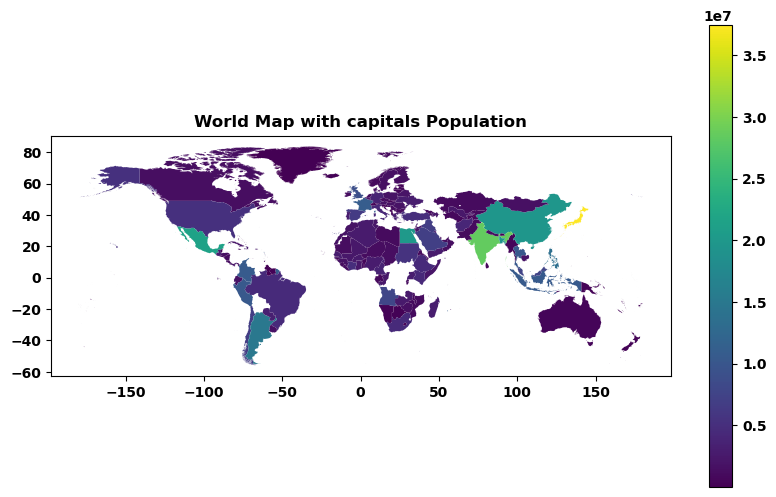

In [67]:
gdf_countries_capitals = gpd.GeoDataFrame(gdf_countries_capitals, geometry=gdf_countries_capitals["geometry_x"])
gdf_countries_capitals.plot("Population", legend=True, figsize=(10, 6), )
plt.title("World Map with capitals Population")
plt.show()

## Summary

This lecture provided an introduction to working with geospatial data using GeoPandas. We covered basic concepts such as reading/writing geospatial data, performing spatial operations (e.g., buffering, intersections), and visualizing geospatial data using maps. GeoPandas, built on Pandas and Shapely, enables efficient and intuitive geospatial analysis in Python.